In [1]:
#import the libraries
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# conda install tweepy
# conda install textblob
# conda install wordcloud


In [2]:
from google.colab import files
uploaded = files.upload()


Saving login.csv to login.csv


In [3]:
log = pd.read_csv('login.csv')

In [4]:
# Twitter API config
twitterApiKey = log['twitterApiKey'][0]
twitterApiSecret = log['twitterApiSecret'][0]
twitterApiAccessToken = log['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = log['twitterApiAccessTokenSecret'][0]

In [5]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
#extracting 100 tweets
posts = api.user_timeline(screen_name ="katyperry", count =100, lang = "en", tweet_mode="extended")
#print last five tweets
i=1
for tweet in posts[0:5]:
  print('-> '+ tweet.full_text + '\n')

In [7]:
#create a data frame
df = pd.DataFrame(data=[tweet.full_text for tweet in posts], columns=['Tweet'])
#lets show data
df.head()

,Tweet
0,!!!ᗩᖇᗴ YOᑌ ᖇᗴᗩᗪY TO ᑭᒪᗩY!!!\n\nIt’s a 🍄TRIP🍄 t...
1,Strap in! Cause next week we’re gonna HEEL you...
2,⚡️ELECTRIC⚡️PIKACHU! FRIDAY! #pokemon25 https:...
3,i know y’all have been waiting for this one 👀 ...
4,3 ways to vote \n2 episodes left\n1 hawt momma...


In [8]:
#clean the data
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT[\s]+', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    
    return txt

In [9]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)
#lets see cleaned 
df

,Tweet
0,!!!ᗩᖇᗴ YOᑌ ᖇᗴᗩᗪY TO ᑭᒪᗩY!!!\n\nIt’s a 🍄TRIP🍄 t...
1,Strap in! Cause next week we’re gonna HEEL you...
2,⚡️ELECTRIC⚡️PIKACHU! FRIDAY! pokemon25
3,i know y’all have been waiting for this one 👀 ...
4,3 ways to vote \n2 episodes left\n1 hawt momma...
...,...
95,Watch out Mt. is about to explode 🌟🌋 American...
96,me about TikTok AmericanIdol
97,An actual live look at my leg hair while I hea...
98,Ok so who is named after one of my idols sing...


In [10]:
#function to get sujectivity and polarity
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity


In [11]:
#add to data frame
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [15]:
#new data frame
df


,Tweet,Subjectivity,Polarity
0,!!!ᗩᖇᗴ YOᑌ ᖇᗴᗩᗪY TO ᑭᒪᗩY!!!\n\nIt’s a 🍄TRIP🍄 t...,0.539773,0.318182
1,Strap in! Cause next week we’re gonna HEEL you...,0.000000,0.000000
2,⚡️ELECTRIC⚡️PIKACHU! FRIDAY! pokemon25,0.000000,0.000000
3,i know y’all have been waiting for this one 👀 ...,0.000000,0.000000
4,3 ways to vote \n2 episodes left\n1 hawt momma...,0.250000,0.250000
...,...,...,...
95,Watch out Mt. is about to explode 🌟🌋 American...,0.000000,0.000000
96,me about TikTok AmericanIdol,0.000000,0.000000
97,An actual live look at my leg hair while I hea...,0.300000,0.068182
98,Ok so who is named after one of my idols sing...,0.525000,0.125000


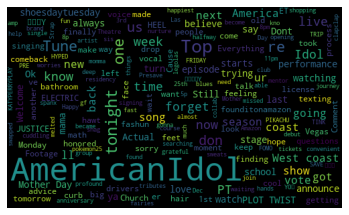

In [21]:
#plot the word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=500, height=300).generate(words)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [22]:
#negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

df['Score'] = df['Polarity'].apply(getTextAnalysis)
#show the data frame
df

,Tweet,Subjectivity,Polarity,Score
0,!!!ᗩᖇᗴ YOᑌ ᖇᗴᗩᗪY TO ᑭᒪᗩY!!!\n\nIt’s a 🍄TRIP🍄 t...,0.539773,0.318182,Positive
1,Strap in! Cause next week we’re gonna HEEL you...,0.000000,0.000000,Neutral
2,⚡️ELECTRIC⚡️PIKACHU! FRIDAY! pokemon25,0.000000,0.000000,Neutral
3,i know y’all have been waiting for this one 👀 ...,0.000000,0.000000,Neutral
4,3 ways to vote \n2 episodes left\n1 hawt momma...,0.250000,0.250000,Positive
...,...,...,...,...
95,Watch out Mt. is about to explode 🌟🌋 American...,0.000000,0.000000,Neutral
96,me about TikTok AmericanIdol,0.000000,0.000000,Neutral
97,An actual live look at my leg hair while I hea...,0.300000,0.068182,Positive
98,Ok so who is named after one of my idols sing...,0.525000,0.125000,Positive


In [30]:
#print all of positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Score'][i] == 'Positive'):
      print(str(j) + ') '+sortedDF['Tweet'][i])
      print()
      j = j+1

1) !!!ᗩᖇᗴ YOᑌ ᖇᗴᗩᗪY TO ᑭᒪᗩY!!!

It’s a 🍄TRIP🍄 to finally be able to announce my brand new show ᑭᒪᗩY a Las Vegas residency, opening Dec 29 2021 @ The Theatre . Everything you need to know about tickets is at   KATYPERRYPLAY 

2) 3 ways to vote 
2 episodes left
1 hawt momma
Top 5 is in your hands 👋🏼
americanidol 

3) Happy Mama’s Day to my Mother’s Day idols (sorry not sorry sis) ♥️
Your Top 7 become your Top 5 with their Mother’s Day tributes (and  songs) hope you’re 🥺cuddling up🥺 / live texting with ur mamas about americanidol tonight! We’re LIVE coast to coast at 8p ET / 5p PT 

4) i found everything i was ever searching for when i became a mother. so grateful for that profound, deep love and honored to join the mama club. happiest Mother’s Day ♥️🌼

5) last week I swapped my sweats for spanx (and heels a’course) to get on Amazon Live and talk all things  🤗 if u missed it no worries cause you can curb ur FOMO (+ snag some fun for ur feet 👣) at  l  shoesdaytuesday 

6) TINK fast - halfw

In [31]:
#print negetive
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending = 'False')
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Score'][i] == 'Negative'):
      print(str(j) + ') '+sortedDF['Tweet'][i])
      print()
      j = j+1

1) HYPED to announce the 3rd signing to  🥁 🥁I’ve melted over his voice since the 1st season of  &amp; am so honored to help nurture n mentor his artist journey⭐️ PRE-SAVE his debut single “why you texting me” out 5/21  

2) A tuna behind the scenes of our very soFISHticated  🐟💦 splash 💦🐟 

3) THIS IS WHAT I MEAN WHEN I SAY PUT THEM THROUGH THE STARWASH ! 🌟🧼 AmericanIdol 

4) We’re all about finding the diamonds in the rough. One 💎GEM💎 from last season is getting polished up for tonights comeback episode of AmericanIdol. Tune in at 8/7c 

5) If you’re watching are you clutching your pearls like I am? We’re going down to 9. Obviously we are not fine. AmericanIdol 

6) OKAY 💀 STONE COLD  💀 CALEB3:16 AmericanIdol 

7) West coast, your turn to tune in to Idol! One of the guests tonight is  who has been a bad influence on me since I was a teen 😳 

8) Hey  can you please teach  how to be 🆒 without trying so hard? AmericanIdol 



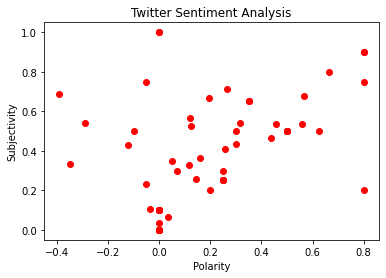

In [39]:
#graph
for i in range(0, df.shape[0]):
        plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="red")
        
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [46]:
#percentage
positive = df[df.Score == 'Positive']
positive = positive['Tweet']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

negative = df[df.Score == 'Negative']
negative = negative['Tweet']

print(str(negative.shape[0]/(df.shape[0])*100) + " % of negative tweets")

35.0 % of positive tweets
8.0 % of negative tweets


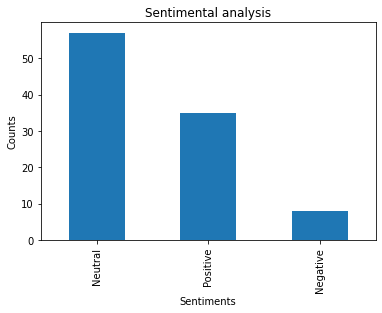

In [47]:
#plot the value count
df['Score'].value_counts()

plt.title('Sentimental analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Score'].value_counts().plot(kind='')
plt.show()